In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_excel("CO2 CON VUOTI.xlsx")

In [10]:
#aggiungo l'altro dataset

df2 = pd.read_csv("Climate-related_Disasters_Frequency.csv")


In [13]:
df2_unpivoted = df2.melt(id_vars=['Country'], 
                         value_vars=[f'F{i}' for i in range(1980, 2023)],
                         var_name='year', 
                         value_name='disasters_count')

# Converte il tipo di dati della colonna 'year' da stringa a intero
df2_unpivoted['year'] = df2_unpivoted['year'].str[1:].astype(int)

print(df2_unpivoted.head())

                        Country  year  disasters_count
0  Afghanistan, Islamic Rep. of  1980              NaN
1  Afghanistan, Islamic Rep. of  1980              NaN
2  Afghanistan, Islamic Rep. of  1980              1.0
3  Afghanistan, Islamic Rep. of  1980              NaN
4  Afghanistan, Islamic Rep. of  1980              NaN


In [17]:
# Rinomino la colonna 'Country' in 'country' nel DataFrame df2_unpivoted
df2_unpivoted.rename(columns={'Country': 'country'}, inplace=True)

# Faccio la join
df_merged = pd.merge(df, df2_unpivoted, on=['country', 'year'], how='inner')
print(df_merged.head())


   country  year  population  cement_co2  cement_co2_per_capita   co2  \
0  Albania  1980   2941650.0       503.0                  171.0  5171   
1  Albania  1980   2941650.0       503.0                  171.0  5171   
2  Albania  1980   2941650.0       503.0                  171.0  5171   
3  Albania  1980   2941650.0       503.0                  171.0  5171   
4  Albania  1980   2941650.0       503.0                  171.0  5171   

   co2_growth_abs  co2_per_capita  coal_co2  coal_co2_per_capita  flaring_co2  \
0         -2413.0          1758.0    2323.0                790.0          0.0   
1         -2413.0          1758.0    2323.0                790.0          0.0   
2         -2413.0          1758.0    2323.0                790.0          0.0   
3         -2413.0          1758.0    2323.0                790.0          0.0   
4         -2413.0          1758.0    2323.0                790.0          0.0   

   flaring_co2_per_capita  gas_co2  gas_co2_per_capita  oil_co2  \
0      

In [19]:
# Rimuovo i duplicati nella join
df_merged.drop_duplicates(inplace=True)

# Stampo le prime righe
print(df_merged.head())


    country  year  population  cement_co2  cement_co2_per_capita   co2  \
0   Albania  1980   2941650.0       503.0                  171.0  5171   
7   Albania  1981   2992391.0       396.0                  132.0  7340   
14  Albania  1982   3041188.0       419.0                  138.0  7308   
21  Albania  1983   3087904.0       424.0                  137.0  7631   
28  Albania  1984   3131731.0       436.0                  139.0  7826   

    co2_growth_abs  co2_per_capita  coal_co2  coal_co2_per_capita  \
0          -2413.0          1758.0    2323.0                790.0   
7           2169.0          2453.0    2644.0                884.0   
14           -32.0          2403.0    2880.0                947.0   
21           323.0          2471.0    3103.0               1005.0   
28           195.0          2499.0    3400.0               1086.0   

    flaring_co2  flaring_co2_per_capita  gas_co2  gas_co2_per_capita  oil_co2  \
0           0.0                     0.0    773.0           

In [22]:
# Calcolo la correlazione tra le emissioni di CO2 e il numero di disastri climatici
correlation = df_merged['co2'].corr(df_merged['disasters_count'])

print("Correlazione tra CO2 e disaster_count:", correlation)


Correlazione tra CO2 e disaster_count: 0.48018850791222883


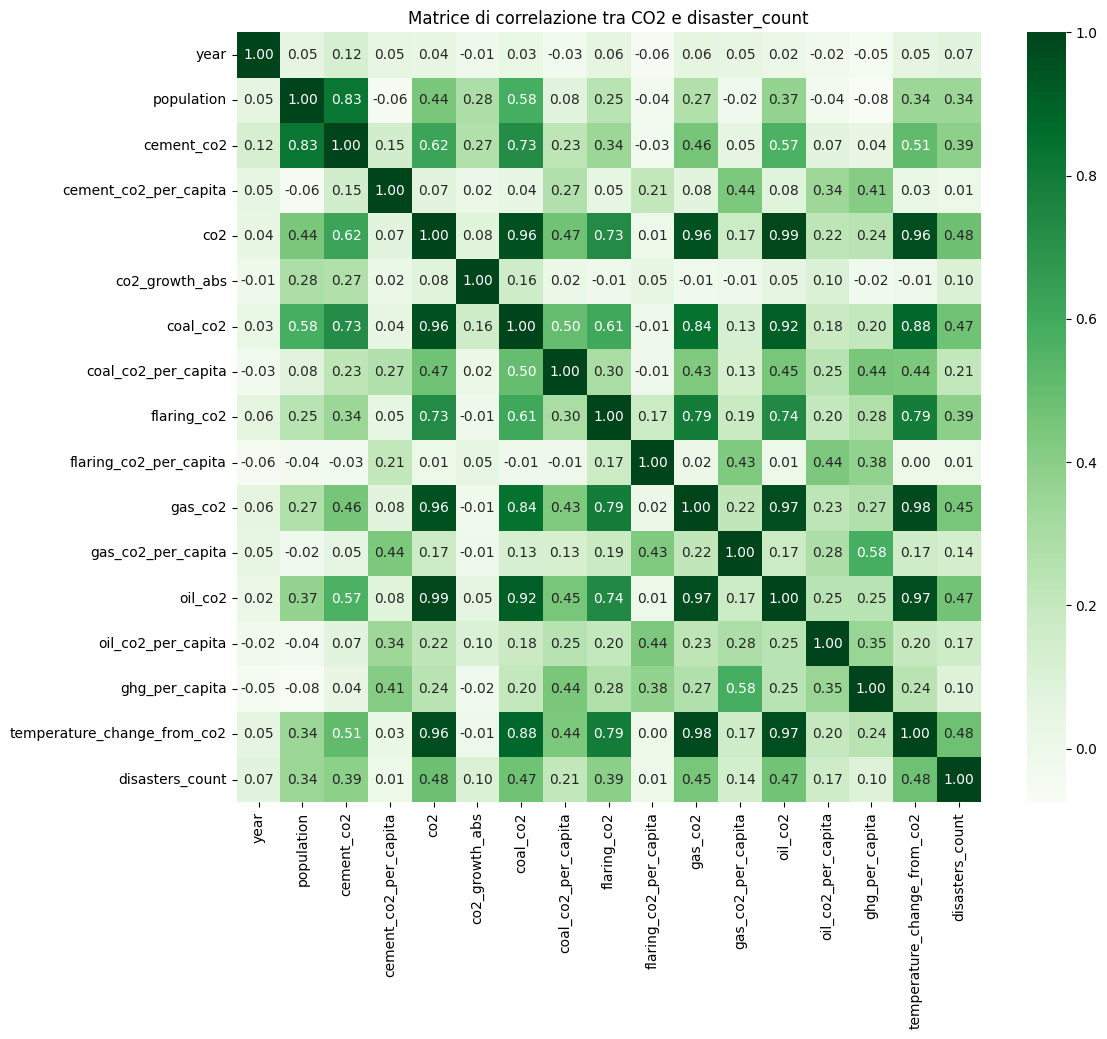

In [28]:
# Seleziona solo le colonne numeriche escludendo 'co2_per_capita' per la matrice di correlazione
numeric_columns = df_merged.select_dtypes(include=[np.number]).drop(columns=['co2_per_capita'])

# Calcola la matrice di correlazione solo per le colonne numeriche
correlation_matrix = numeric_columns.corr()

# Crea il heatmap della matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Matrice di correlazione tra CO2 e disaster_count')
plt.show()



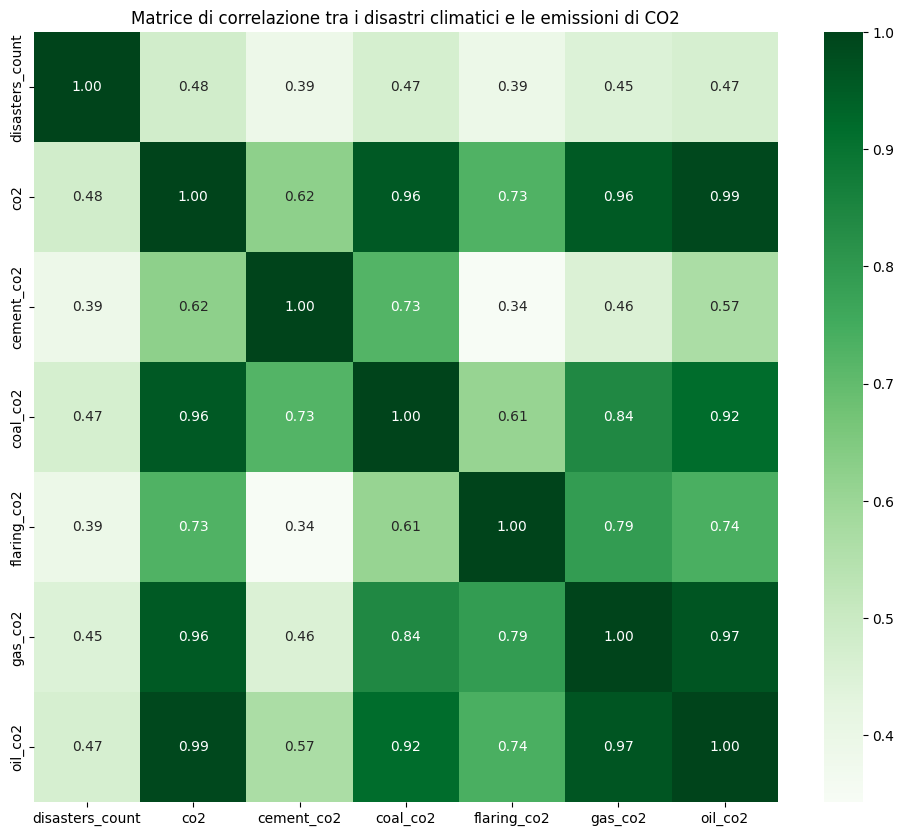

In [31]:
# Seleziona solo le colonne desiderate
selected_columns = ['disasters_count','co2', 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2']
df_selected = df_merged[selected_columns]

# Calcola la matrice di correlazione
correlation_matrix = df_selected.corr()

# Visualizza il heatmap della matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title("Matrice di correlazione tra i disastri climatici e le emissioni di CO2")
plt.show()
